In [163]:
import pandas as pd

df = pd.read_csv("../data/cars_full.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [170]:
categorical_features_mask = ~(df.dtypes == 'float')

categorical_features = df.columns[categorical_features_mask].tolist()

df_categorical = df[categorical_features]

In [173]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [172]:
categorical_features

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [165]:
df_categorical

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,2548,dohc,four,130,mpfi,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,2548,dohc,four,130,mpfi,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,2823,ohcv,six,152,mpfi,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,2337,ohc,four,109,mpfi,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,2824,ohc,five,136,mpfi,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,2952,ohc,four,141,mpfi,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,3049,ohc,four,141,mpfi,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,3012,ohcv,six,173,mpfi,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,3217,ohc,six,145,idi,106,4800,26,27


In [161]:
df = pd.get_dummies(df[categorical_features])


KeyError: "['CarName', 'fueltype', 'fuelsystem', 'carbody', 'cylindernumber', 'enginelocation', 'drivewheel', 'aspiration', 'enginetype', 'doornumber'] not in index"

In [162]:
df['price']

KeyError: 'price'

In [137]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df)

In [139]:
scaled_df.price

AttributeError: 'numpy.ndarray' object has no attribute 'price'

In [23]:
df.price_range.value_counts()

0    118
1     68
Name: price_range, dtype: int64

# Duplicate oversampling without leakage

In [31]:
from sklearn.model_selection import train_test_split

# Split into Train/Test
data_train, data_test = train_test_split(df,test_size=0.3,random_state=1)

data_train.price_range.value_counts()

0    83
1    47
Name: price_range, dtype: int64

In [34]:
# Divide by class
expensive = data_train[data_train['price_range'] == 1]
cheap = data_train[data_train['price_range'] == 0]

# Randomly sample the minority class
expensive_over = expensive.sample(len(cheap), replace = True, random_state=1)

# Concatenate oversampled "woman" data and original "man" data
balanced_train = pd.concat([expensive_over, cheap], axis=0).reset_index(drop=True)

balanced_train.price_range.value_counts()

1    83
0    83
Name: price_range, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 2000)

model.fit(balanced_train.drop(columns=["price_range"]),balanced_train['price_range'])

model.score(X_test,y_test)

0.9

# SMOTE

In [47]:
from imblearn.over_sampling import SMOTE
import collections

sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_sample(data_train.drop(columns=["price_range"]), data_train['price_range'])

collections.Counter(y_res)

model = LogisticRegression(max_iter = 2000)

model.fit(X_res,y_res)

model.score(X_test,y_test)

/Users/benjaminauzanneau/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.84

## Feature Selection

In [84]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(f_classif, k=1)

X_new = selector.fit_transform(X_train, y_train)

feature_importance = pd.DataFrame( selector.scores_, X_train.columns, columns=["scores"]).sort_values(by="scores", ascending =False)

feature_importance

/Users/benjaminauzanneau/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 8] are constant.
  UserWarning)
/Users/benjaminauzanneau/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,scores
curbweight,168.944733
carwidth,87.186670
cooks_distance,40.514186
aspiration,22.267758
l,6.996003
ohcf,6.821501
cylindernumber,6.514350
ohcv,5.186782
ohc,4.351972
rotor,0.957121


In [88]:
from sklearn.model_selection import cross_val_score

feature_list = feature_importance.index
n = list(range(1, 15))

n_features = []
scores = []

for n in n:
    features = feature_list[:n]
    model = LogisticRegression(max_iter = 2000)
    model.fit(X_train[features], y_train)
    n_features.append(n)
    #scores.append(model.score(X_test[features],y_test))
    scores.append(cross_val_score(model,X_test[features],y_test, cv=20).mean())

Text(0, 0.5, 'accuracy')

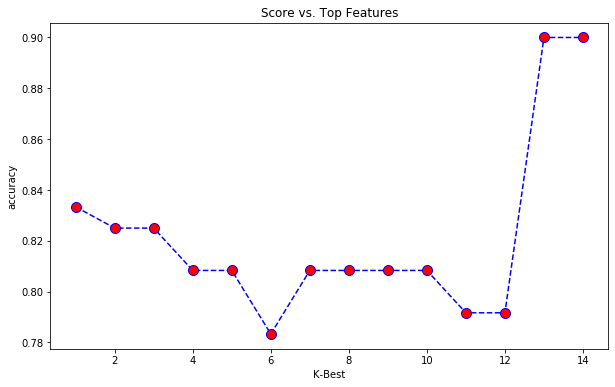

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(n_features,scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. Top Features')
plt.xlabel('K-Best')
plt.ylabel('accuracy')